# Phishing Detection Training

- This notebook will implement and test multiple models for URL detection

First we import libraries and get data. We will split the data into:

Training - 70%

Cross Validation - 10%

Testing - 20%

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import evaluation_functions as evaluate

In [4]:
data = pd.read_csv('../data/data_featured.csv', index_col=0)
print("Columns Loaded in: ", list(data.columns))

X = data.drop('Label', axis=1)
Y = data['Label']

# Split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Split training so we get 10% overrall cross validation
x_train, x_cross, y_train, y_cross = train_test_split(x_train, y_train,
                                                  test_size=0.125, random_state=1)

Columns Loaded in:  ['Label', 'periods', 'slashes', 'doubleSlashes', 'atSymbol', 'length', 'numberCount', 'firstdigit', 'wLetter', 'vLetter', 'xLetter', 'zLetter', 'jLetter', 'qLetter', 'pathHasDomain', 'IP', 'semicolon', 'domain', 'vowels', 'dotService', 'hash', 'Vocab']


# Train

Now we train a simple Random Forest classifier. We will evaluate using accuracies, f-score and confusion matricies. Also we can output the incorrect false negatives and positives into a .csv file to find out what we are doing wrong.

Training Model - Random Forest ...
Model Trained - Random Forest ... 
Caclulating Accuracies ...

Training f1 Score: 0.8792004536708075
Training Accuracy: 0.935187665294468

Cross Validation f1 Score: 0.8336398937257306
Cross Validation Accuracy: 0.9110949303722581

Testing f1 Score: 0.8383674722425938
Testing Accuracy: 0.9137435150632566


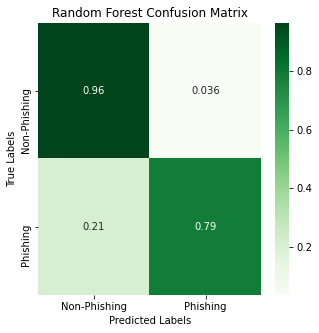

In [5]:


print('Training Model - Random Forest ...')

forest = RandomForestClassifier(min_samples_leaf=3)
forest.fit(x_train, y_train)

print("Model Trained - Random Forest ... ")

train_predicts, cross_predicts, test_predicts = evaluate.print_accuracies(forest, x_train, y_train, x_cross, y_cross, x_test, y_test)
evaluate.confusion_matrix_plot(y_test, test_predicts, title='Random Forest Confusion Matrix')

In [6]:
true_positives = y_cross == 1
predicted_negatives = cross_predicts == 0

og_data = pd.read_csv('../data/phishing_site_urls.csv')

false_negative_indexes = np.array((true_positives != predicted_negatives)).nonzero()[0]

og_data.iloc[false_negative_indexes, 0].to_csv("false_negatives_cross_validation.csv")

In [7]:
import pickle

with open('my_dumped_classifier.pkl', 'wb') as fid:
    pickle.dump(forest, fid)